# **Import Library**

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

# **Load and Clean Dataset**

In [16]:
def load_data(path_csv):
	df = pd.read_csv(path_csv)
	df.drop_duplicates(inplace=True) # drop duplicate value
	df.dropna(inplace=True) # drop missing value
	df.info()
	return df

In [17]:
path = "fraud_oracle.csv"
df = load_data(path)
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


# **Feature Definitions**

- **Month**: Month of the insurance claim.
- **WeekOfMonth**: Week of the month of the claim.
- **DayOfWeek**: Day of the week of the claim.
- **Make**: Vehicle manufacturer.
- **AccidentArea**: Accident area (urban/rural).
- **DayOfWeekClaimed**: Day of the week the claim was processed.
- **MonthClaimed**: Month the claim was processed.
- **WeekOfMonthClaimed**: Week of the month the claim was processed.
- **Sex**: Policyholder's gender.
- **MaritalStatus**: Policyholder's marital status.
- **Age**: Policyholder's age.
- **Fault**: Policyholder at fault (yes/no).
- **PolicyType**: Type of insurance policy.
- **VehicleCategory**: Vehicle category (e.g., sedan, SUV).
- **VehiclePrice**: Price of the vehicle.
- **FraudFound_P**: Fraud detected (yes/no).
- **PolicyNumber**: Insurance policy identifier.
- **RepNumber**: Insurance representative identifier.
- **Deductible**: Out-of-pocket amount before insurance coverage.
- **DriverRating**: Driver's rating.
- **Days_Policy_Accident**: Days from policy issue to accident.
- **Days_Policy_Claim**: Days from policy issue to claim.
- **PastNumberOfClaims**: Previous claims by the policyholder.
- **AgeOfVehicle**: Age of the vehicle.
- **AgeOfPolicyHolder**: Age of the policyholder.
- **PoliceReportFiled**: Police report filed (yes/no).
- **WitnessPresent**: Witness present (yes/no).
- **AgentType**: Type of insurance agent (internal/external).
- **NumberOfSuppliments**: Number of supplementary documents/claims.
- **AddressChange_Claim**: Address change at the time of claim (yes/no).
- **NumberOfCars**: Number of cars insured.
- **Year**: Year of the claim.
- **BasePolicy**: Base policy type (e.g., Liability, Collision, All Perils).

# **Exploratory Data Analysis**

## Characteristic of Dataset

In [18]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


- "PolicyNumber" is merely an identification number. Let's drop It
- The minimum value of "Age" is 0. It totally doesn't make sense. Let's drop value 0

In [41]:
# Summarize the unique of dataset
def summarize(df):
    
    summary = pd.DataFrame()
    
    # Data Type
    summary['Data Type'] = df.dtypes
    # N Unique
    summary['N Unique'] = df.nunique()
    # Unique
    summary['Unique'] = df.apply(lambda x: x.unique().tolist())
    
    return summary

In [116]:
X = summarize(df)
X.head()

,Data Type,N Unique,Unique
Month,object,12,"[Dec, Jan, Oct, Jun, Feb, Nov, Apr, Mar, Aug, Jul, May, Sep]"
WeekOfMonth,int64,5,"[5, 3, 2, 4, 1]"
DayOfWeek,object,7,"[Wednesday, Friday, Saturday, Monday, Tuesday, Sunday, Thursday]"
Make,object,19,"[Honda, Toyota, Ford, Mazda, Chevrolet, Pontiac, Accura, Dodge, Mercury, Jaguar, Nisson, VW, Saab, Saturn, Porche, BMW, Mecedes, Ferrari, Lexus]"
AccidentArea,object,2,"[Urban, Rural]"


In [47]:
X[X["N Unique"] < 3]

,Data Type,N Unique,Unique
AccidentArea,object,2,"[Urban, Rural]"
Sex,object,2,"[Female, Male]"
Fault,object,2,"[Policy Holder, Third Party]"
FraudFound_P,int64,2,"[0, 1]"
PoliceReportFiled,object,2,"[No, Yes]"
WitnessPresent,object,2,"[No, Yes]"
AgentType,object,2,"[External, Internal]"


- "Sex", "PoliceReportFiled",... ,"WitnessPresent" are actually Boolen Types. Should be converted to 0 or 1.

## Target Variable Balance

In [49]:
target_count = df['FraudFound_P'].value_counts().reset_index()
target_count.columns = ['FraudFound_P', 'Count']
target_count

,FraudFound_P,Count
0,0,14497
1,1,923


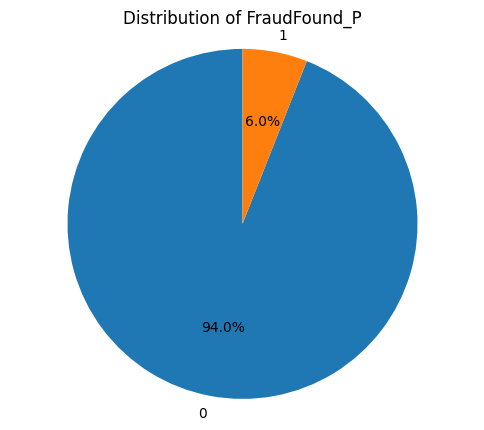

In [63]:
# pie chart
plt.figure(figsize=(6, 5))
plt.pie(target_count['Count'], labels=target_count['FraudFound_P'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of FraudFound_P')
plt.axis('equal')

plt.show()

The Target Variable "Fraud_Found_P" is highly imbalanced.

## Fraud Detection by Feature

In [98]:
def fraud_by_feature(feature, df, figsize=(8, 6)):
    """
    Generate a bar chart showing the percentage of fraud cases by the given feature using Matplotlib.

    Parameters:
        feature (str): The column name to analyze.
        df (DataFrame): The input DataFrame.
        figsize (tuple): Size of the figure.

    Returns:
        None: Displays a bar chart.
    """
    # Calculate total counts for the feature
    total_counts = df[feature].value_counts()
    
    # Filter rows where FraudFound_P == 1
    df_fraud = df[df['FraudFound_P'] == 1]
    
    # Calculate fraud counts for the feature
    fraud_counts = df_fraud[feature].value_counts()
    
    # Calculate fraud percentages
    fraud_percentages = (fraud_counts / total_counts * 100).fillna(0).sort_index()
    
    # Bar Chart
    plt.figure(figsize=figsize)
    plt.bar(fraud_percentages.index, fraud_percentages.values)
    
    plt.title(f'Fraud Detection by {feature} (%)')
    plt.xlabel(feature)
    plt.ylabel('Fraud Percentage')
    
    plt.tight_layout()
    plt.show()

### by Sex

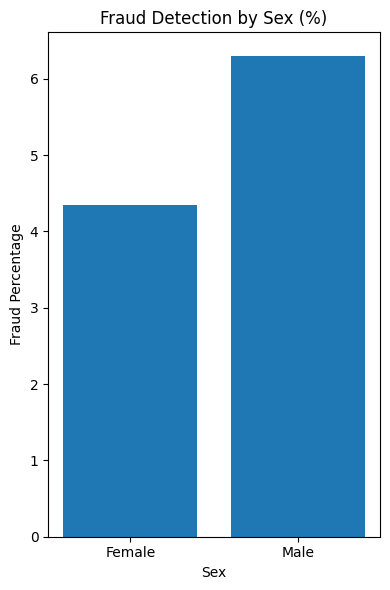

In [99]:
fraud_by_feature('Sex', df, figsize=(4,6))

- males are significantly more likely to be involved in detected fraud cases compared to females

### by Age

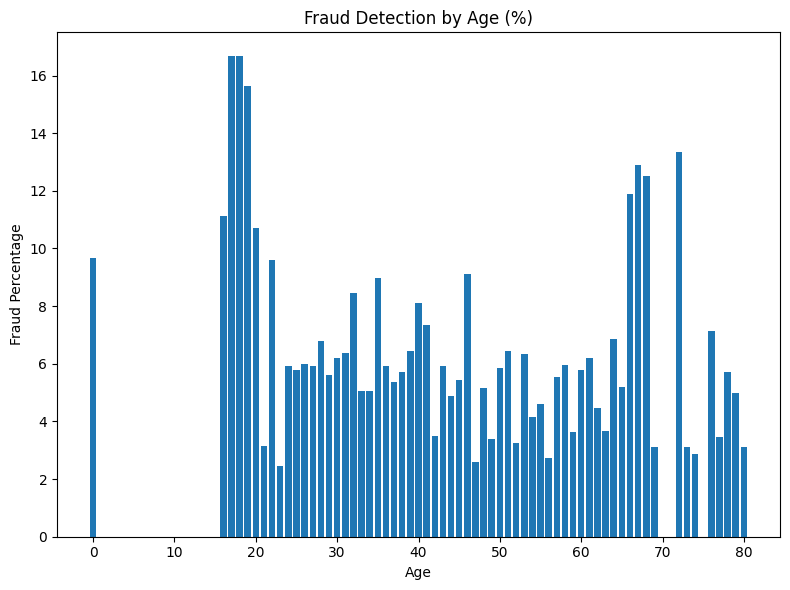

In [100]:
fraud_by_feature('Age', df)

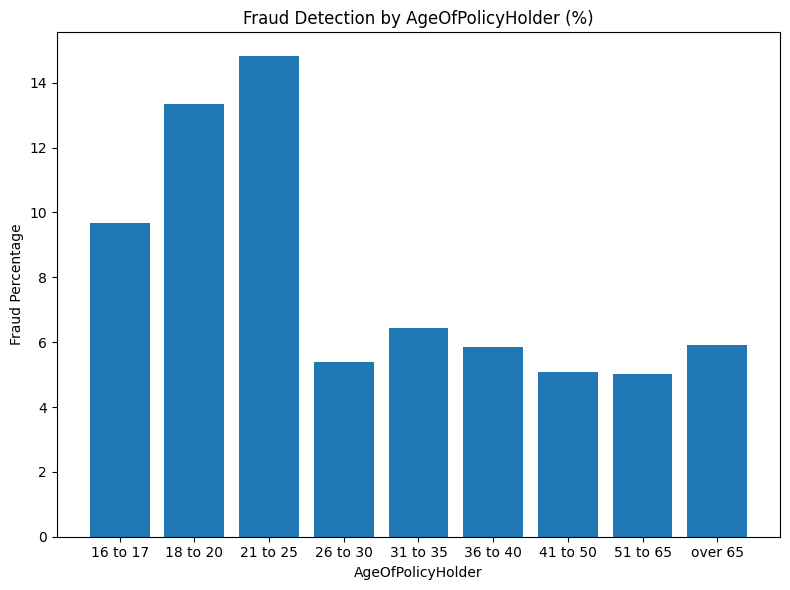

In [101]:
fraud_by_feature('AgeOfPolicyHolder', df, figsize=(8,6))

- Fraud is most frequently detected among teenagers and retired seniors
- the 31 - 40 age group exhibits a high fraud rate in "Age of Policy Holder" feature.

### by Vehicle

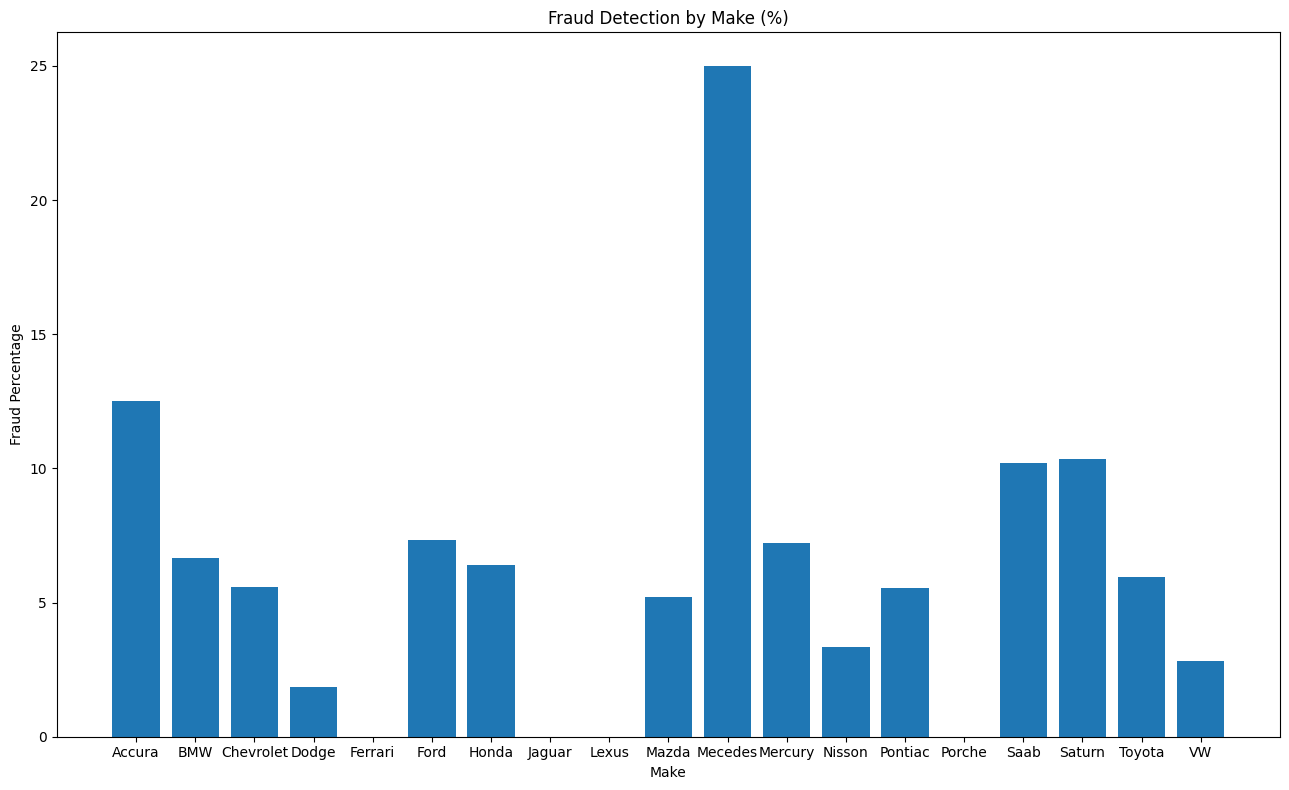

In [102]:
fraud_by_feature('Make', df, figsize=(13,8))

- Mercedes owners were more likely to be involved in fraud, with a rate nearly double that of the next highest group, Accura owners. 
- On the other hand, Porsche, Lexus, Jaguar, and Ferrari owners were never reported for fraud; all four of these vehicles are expensive.

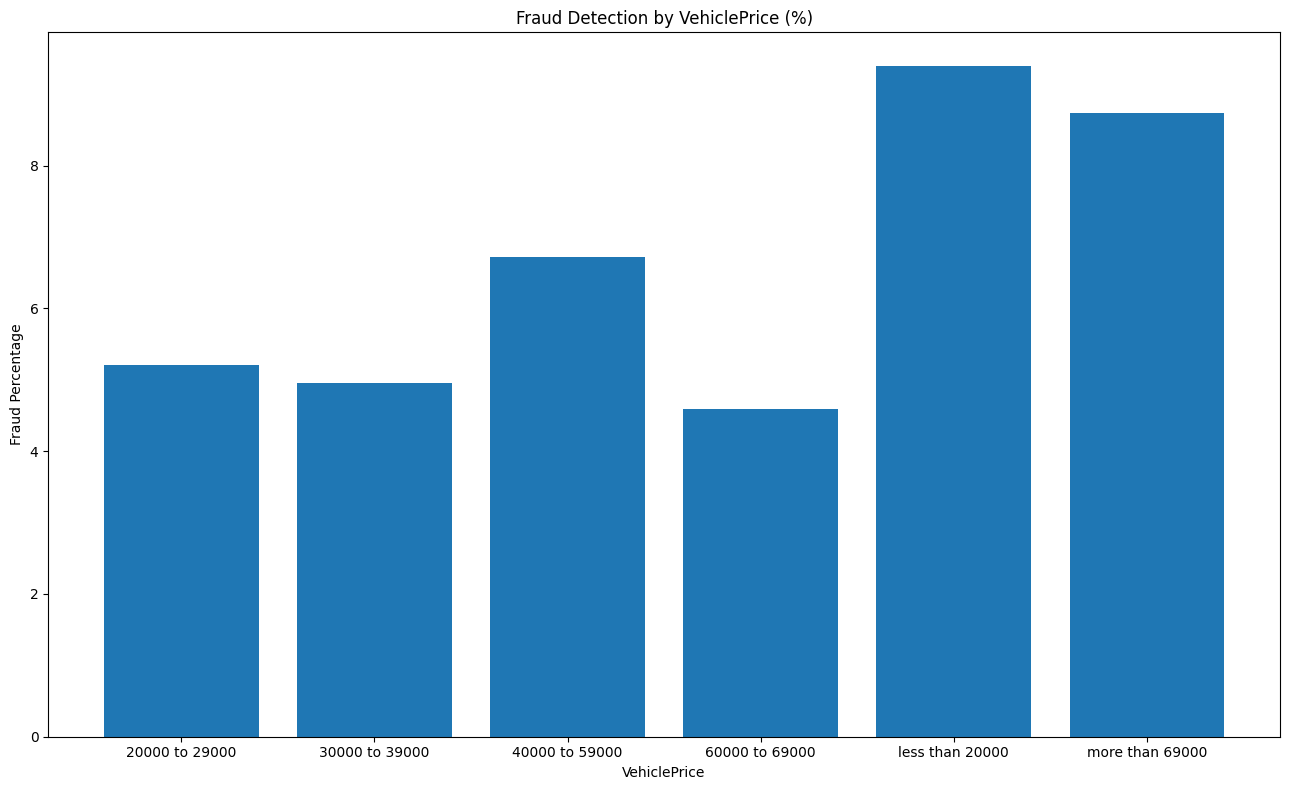

In [103]:
fraud_by_feature('VehiclePrice', df, figsize=(13,8))

- Fraud cases were most frequently detected in the most expensive or cheapest vehicles.

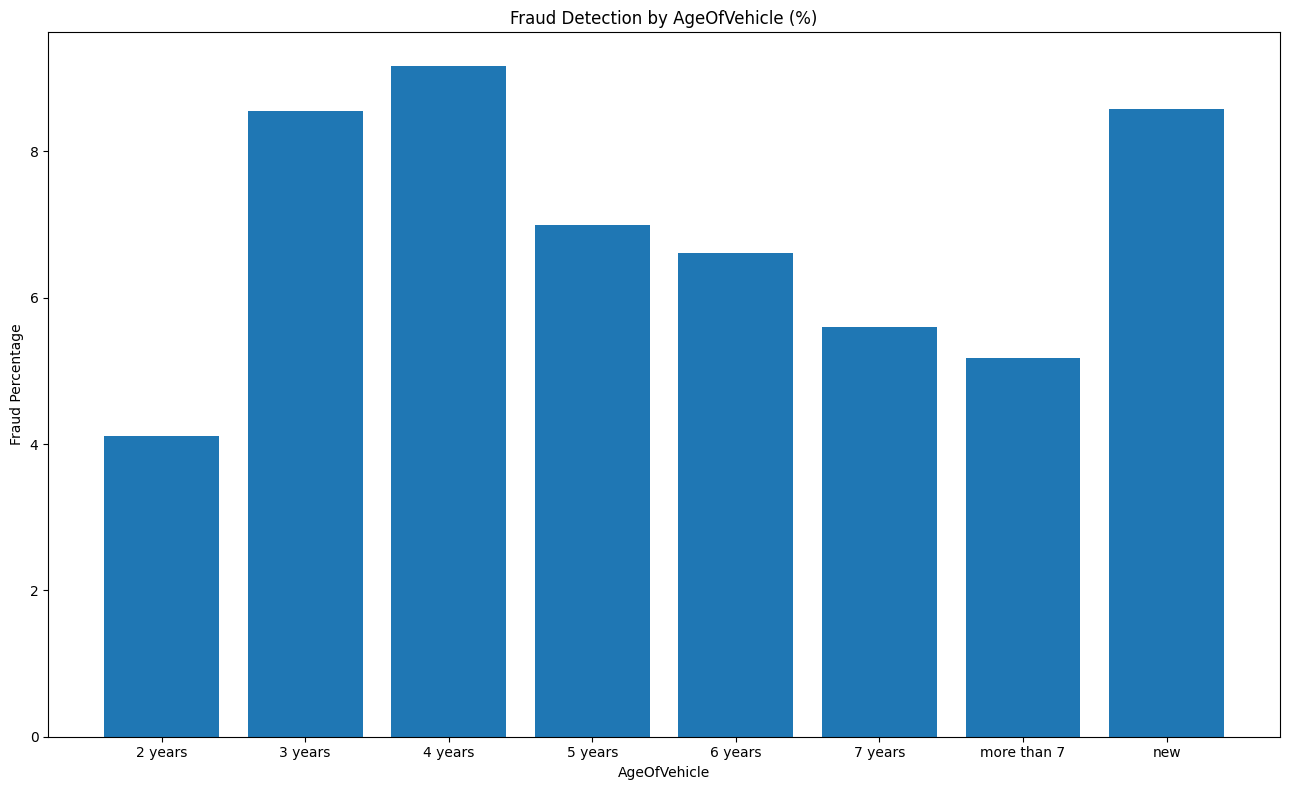

In [111]:
fraud_by_feature('AgeOfVehicle', df, figsize=(13,8))

- The “Age of Vehicle” feature can actually be reclassified into 3 categories; Highest, Medium and Low Fraud Groups.

### by Policy

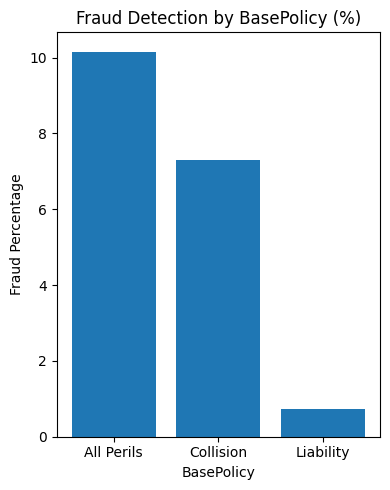

In [107]:
fraud_by_feature('BasePolicy', df, figsize=(4,5))

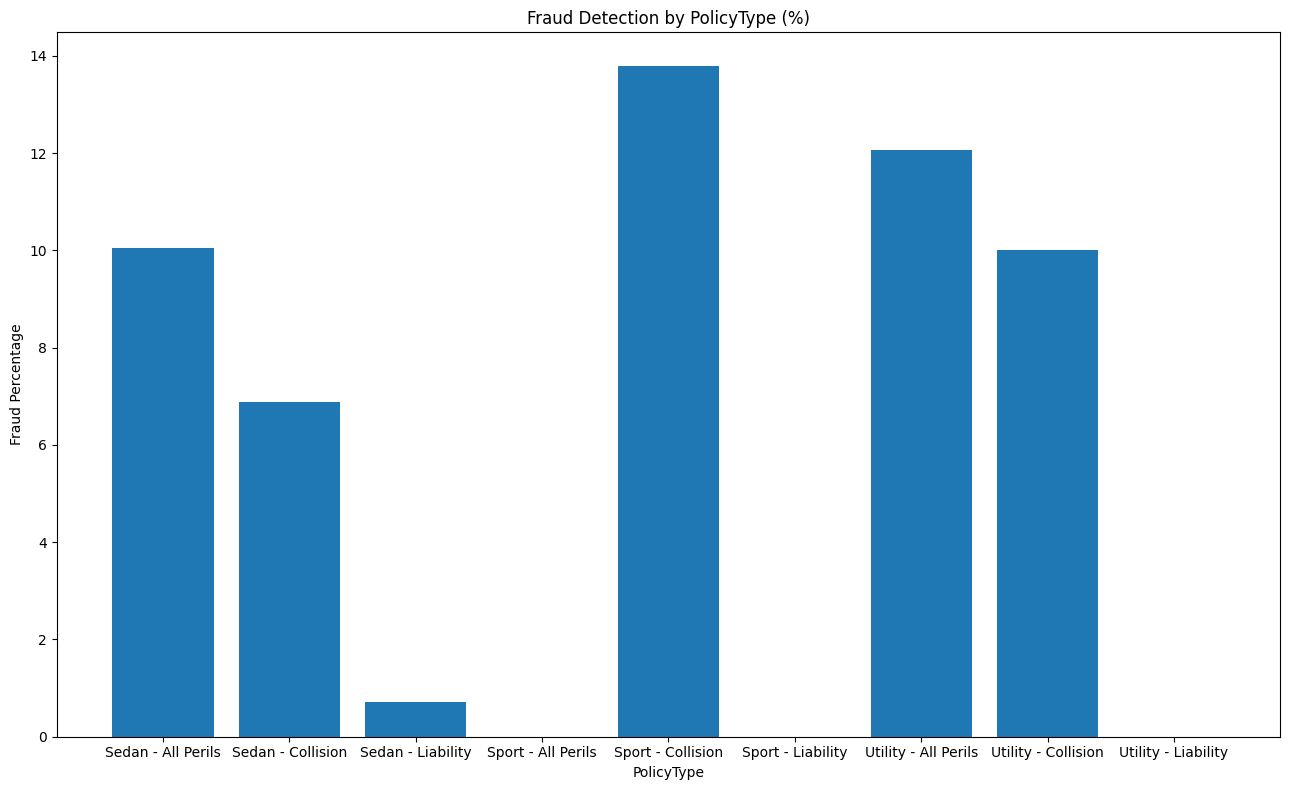

In [110]:
fraud_by_feature('PolicyType', df, figsize=(13,8))

- Fraud cases were detected most frequently under “All Risks”. For specific policy types, “Sports-Collection” had the highest fraud detection rate.

### by Month

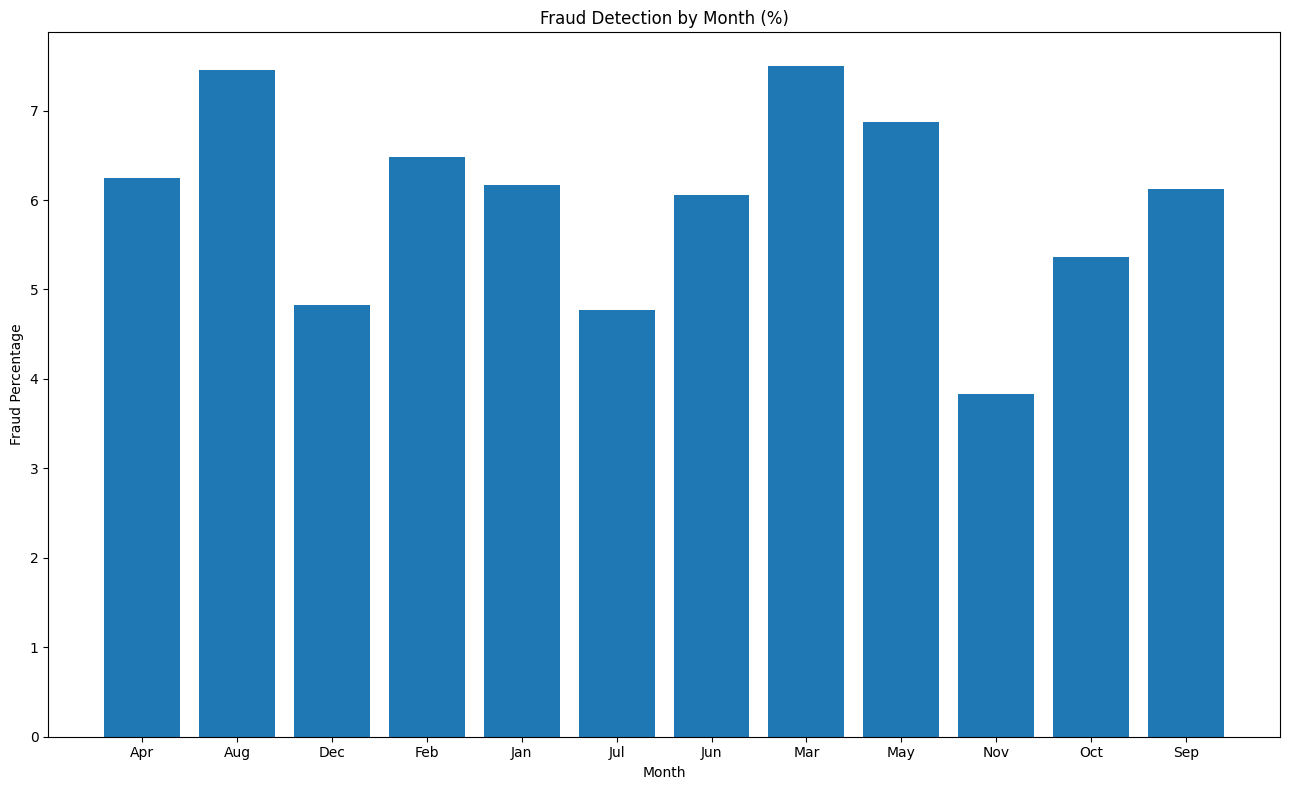

In [112]:
fraud_by_feature('Month', df, figsize=(13,8))

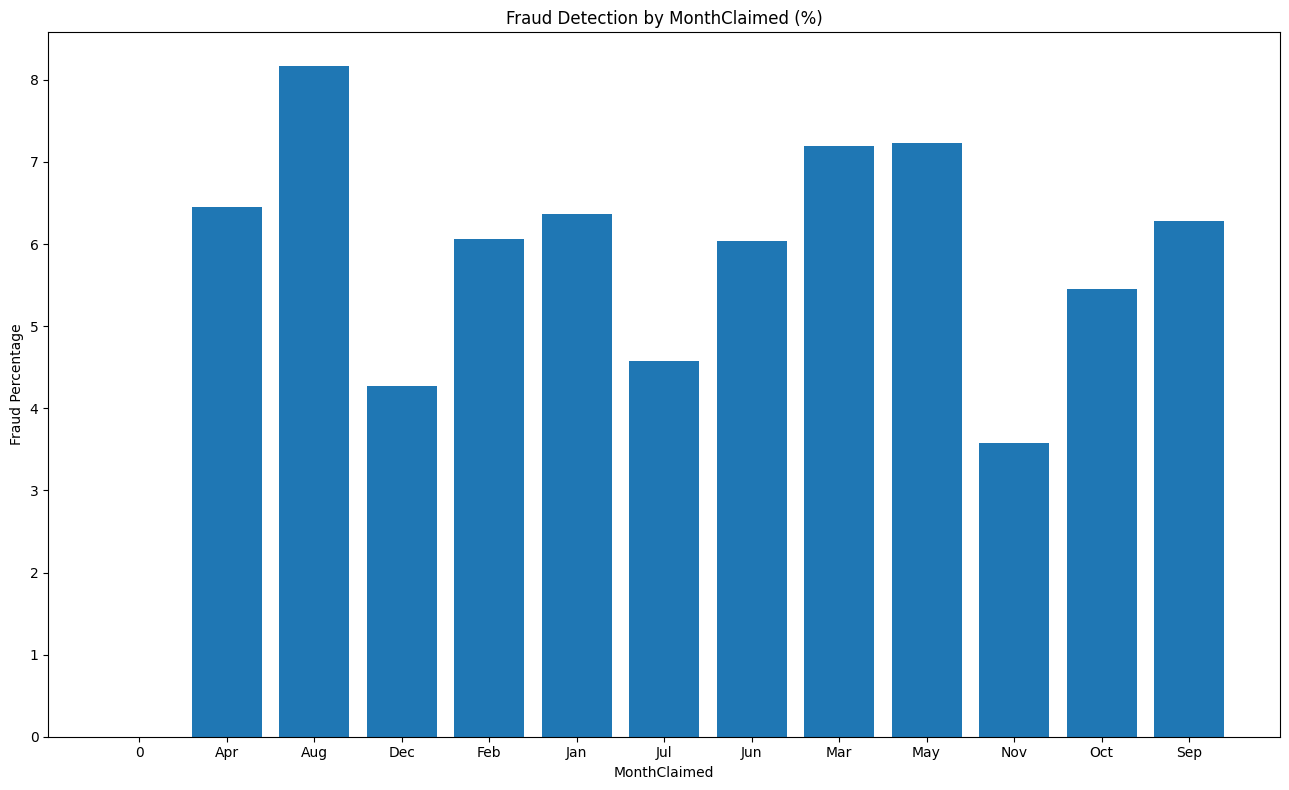

In [113]:
fraud_by_feature('MonthClaimed', df, figsize=(13,8))

- Overall, both are similar and not too different, so you don't need both.

# **Data Preprocessing**

In [117]:
df_pre = df.copy()

### Binary Variable

- AccidentArea, Sex, Fault, PoliceReportFiled, WitnessPresent, AgentType

These features have only two unique values.
Therefore, I applied Label Encoding to map them to 0 and 1.